In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,median_absolute_error

In [16]:
datos = pd.read_csv("/content/drive/MyDrive/Semillero/cleaned_data.csv", index_col=False)
datos.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,0,3,2,5,1,3,12691.0,777,...,1,0,0,0,1,0,1,0,0,0
1,0,49,1,5,0,6,1,2,8256.0,864,...,0,0,0,0,0,1,1,0,0,0
2,0,51,0,3,3,4,1,0,3418.0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,1,4,0,3,4,1,3313.0,2517,...,1,0,0,0,1,0,1,0,0,0
4,0,40,0,3,2,5,1,0,4716.0,0,...,0,0,1,0,1,0,1,0,0,0


# Division de datos
Haremos una de division de datos en testeo y entrenamiento. Este corresponde a un 30% de los datos para testear

In [17]:
X= datos.drop("Total_Trans_Amt",axis=1)
y = datos["Total_Trans_Amt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"la longitud de X es {X_train.shape} y la longitud de y {y_train.shape}")

la longitud de X es (7088, 26) y la longitud de y (7088,)


Aunque los arboles de decision no normalmente no necesitan un escalamiento de los datos en esta caso especifico se nos presenta un mejor rendimiento del modelo con los datos escalados, por esta razon vamos a hacer un escalamiento usando el escalador minmax.

In [18]:
escalador_x = preprocessing.MinMaxScaler()
escalador_y = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(escalador_x.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(escalador_x.transform(X_test), columns=X_test.columns)
y_train=escalador_y.fit_transform(y_train.values.reshape(-1,1))
y_test = escalador_y.transform(y_test.values.reshape(-1,1))
X_train.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.0,0.547619,0.0,0.4,0.50,0.4,0.333333,0.000000,0.200700,0.780691,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.833333,1.0,0.0,0.00,0.6,0.333333,0.333333,0.212763,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.023810,0.0,0.0,0.75,0.0,0.166667,0.500000,1.000000,0.449344,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.619048,1.0,0.2,0.00,0.0,0.166667,0.500000,0.048422,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.428571,1.0,0.6,0.00,0.2,0.500000,0.500000,0.023874,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [25]:
profundidades = []
ecms = []

for i in range(0,21):
  if i==0:
    bosque_regresor =  RandomForestRegressor(n_estimators=100,min_samples_split=2,random_state=1)
    bosque_regresor.fit(X_train,np.ravel(y_train))

    y_pred = bosque_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms.append(ecm)
    profundidades.append(i)

  else:
    bosque_regresor =  RandomForestRegressor(n_estimators=100,max_depth=i,min_samples_split=2,random_state=1)
    bosque_regresor.fit(X_train,np.ravel(y_train))

    y_pred = bosque_regresor.predict(X_test)

    ecm = mean_squared_error(y_test, y_pred)

    ecms.append(ecm)
    profundidades.append(i)

Text(0.5, 1.0, 'Rendimiento del modelo por cada nivel de profundidad')

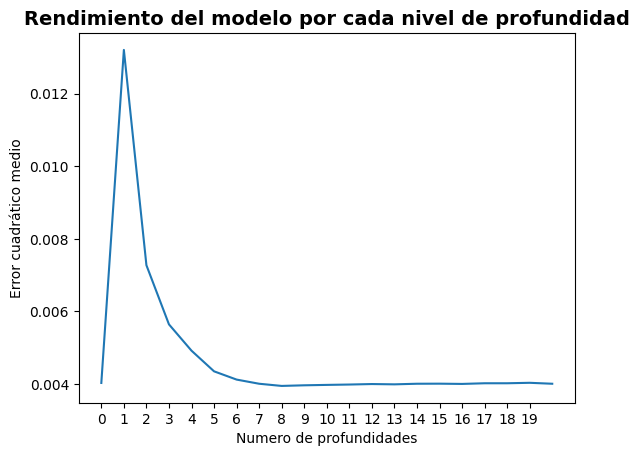

In [20]:
fig, ax = plt.subplots()
ax.plot(profundidades,ecms)
ax.set_xticks(range(0, 20))

plt.ylabel('Error cuadrático medio')
plt.xlabel('Numero de profundidades')
plt.title('Rendimiento del modelo por cada nivel de profundidad',fontdict = {'fontsize':14, 'fontweight':'bold'})

In [21]:
#vamos a buscar el numero mas pequeño en la lista errores_cuadraticos_medios
numero_pequeño = 100000
pocision = 0 #La pocision donde se encuentra el numero mas pequeño
for i in range(0,len(ecms)):
  if ecms[i] < numero_pequeño:
    numero_pequeño = ecms[i]
    pocision = i

print(f"El error cuadratico medio mas pequeño es {numero_pequeño} pertenciente a la profundidad numero {profundidades[pocision]}")

El error cuadratico medio mas pequeño es 0.003948269304870675 pertenciente a la profundidad numero 8


In [22]:
bosque_aleatorio = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=2,random_state=1)

In [23]:
bosque_aleatorio.fit(X_train,np.ravel(y_train))

y_pred = bosque_aleatorio.predict(X_test)

ecm = mean_squared_error(y_test, y_pred)
ecm = escalador_y.inverse_transform(ecm.reshape(-1,1))[0][0]
eam = median_absolute_error(y_test,y_pred)
eam = escalador_y.inverse_transform(eam.reshape(-1,1))[0][0]
error = np.sqrt(ecm)

print("Error cuadrático medio (MSE):", ecm)
print("Error absoluto medio (MAE):", eam)
print("El error es ", error)

Error cuadrático medio (MSE): 580.9661924857454
Error absoluto medio (MAE): 867.3372570212812
El error es  24.103240290171474


# Validacion Cruzada

Vamos a usar esta vez validacion cruzada a ver si cambia algo


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#recordemos que tengo mis datos sin dividir en las variables X y Y

X = pd.DataFrame(escalador_x.fit_transform(X), columns=X.columns)
y=escalador_y.fit_transform(y.values.reshape(-1,1))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(bosque_aleatorio , X, np.ravel(y), cv=kf, scoring="neg_mean_absolute_error")

scores_final = list(map(lambda x:escalador_y.inverse_transform(x.reshape(-1,1))[0][0]*-1,scores))

print("Scores de validación cruzada:", scores_final)
print("error cuadratico medio:", np.mean(scores_final))
print("El error promedio es: ",np.sqrt( np.mean(scores_final)))

Scores de validación cruzada: [153.94836484902606, 108.74772714815822, 124.60374888531032, 146.75026810642618, 117.8188222846145]
error cuadratico medio: 130.37378625470706
El error promedio es:  11.41813409689635
